# San Francisco Airport - Clustering

Bu proje, San Francisco Havaalanı'ndaki verileri kullanarak kümeleme analizi gerçekleştirir. Elbow Method kullanılarak uygun küme sayısı belirlenir ve ardından veriler bu kümelere göre gruplandırılır. Sonuç olarak, her bir küme San Francisco Havaalanı'nın farklı özelliklerine göre benzer özelliklere sahip veri noktalarını içerecektir. Bu analiz, havaalanı yönetiminin farklı bölgeleri veya alanları hakkında anlamlı içgörüler elde etmesine ve karar alma süreçlerini iyileştirmesine yardımcı olabilir.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from sklearn import datasets
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer

In [2]:
df=pd.read_csv('air-traffic-passenger-statistics.csv')
df

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090
...,...,...,...,...,...,...,...,...,...,...,...,...
18880,201806,WOW Air,WW,WOW Air,WW,International,Europe,Enplaned,Other,International,G,50
18881,201806,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Deplaned,Other,International,A,10868
18882,201806,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Enplaned,Other,International,A,11664
18883,201806,XL Airways France,SE,XL Airways France,SE,International,Europe,Deplaned,Other,International,A,804


In [3]:
df.isnull().sum()

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    63
Published Airline               0
Published Airline IATA Code    63
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
dtype: int64

In [4]:
x=df.drop(['Operating Airline IATA Code','Published Airline IATA Code'],axis=1)

In [5]:
x=df[['Activity Period','Passenger Count']]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              18885 non-null  int64 
 1   Operating Airline            18885 non-null  object
 2   Operating Airline IATA Code  18822 non-null  object
 3   Published Airline            18885 non-null  object
 4   Published Airline IATA Code  18822 non-null  object
 5   GEO Summary                  18885 non-null  object
 6   GEO Region                   18885 non-null  object
 7   Activity Type Code           18885 non-null  object
 8   Price Category Code          18885 non-null  object
 9   Terminal                     18885 non-null  object
 10  Boarding Area                18885 non-null  object
 11  Passenger Count              18885 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 1.7+ MB


In [7]:
wcss=[]
ss=[]
for i in range(2,10):
    model=KMeans(i)
    model=model.fit(x)
    tahmin=model.predict(x)
    ss1=silhouette_score(x,tahmin)
    ss.append(ss1)
    print(ss1)
    wcss.append(model.inertia_)

0.8594457336140584
0.8281862277297536
0.7852269694046379
0.7837146898121863
0.661979748102718
0.6629450301250422
0.6455155493474974
0.636173006271785


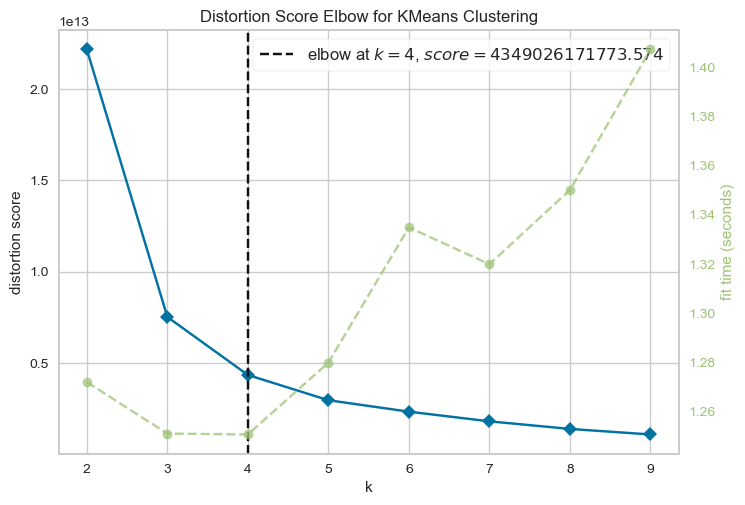

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
km=KMeans(random_state=42)
vis=KElbowVisualizer(km,k=(2,10)) 
vis.fit(x)
vis.show()

In [9]:
model=KMeans(4)
model=model.fit(x)
tahmin=model.predict(x)
tahmin

array([3, 3, 3, ..., 3, 3, 3])

In [10]:
x['cluster']=tahmin
x.head()

,Activity Period,Passenger Count,cluster
0,200507,27271,3
1,200507,29131,3
2,200507,5415,3
3,200507,35156,0
4,200507,34090,3


In [11]:
x['Operating Airline']=df['Operating Airline']

In [12]:
x[x['cluster']==1]

,Activity Period,Passenger Count,cluster,Operating Airline
93,200507,443656,1,United Airlines - Pre 07/01/2013
94,200507,421802,1,United Airlines - Pre 07/01/2013
212,200508,420430,1,United Airlines - Pre 07/01/2013
213,200508,398135,1,United Airlines - Pre 07/01/2013
330,200509,357533,1,United Airlines - Pre 07/01/2013
...,...,...,...,...
18736,201806,306070,1,Alaska Airlines
18847,201806,336895,1,United Airlines
18848,201806,335810,1,United Airlines
18850,201806,506400,1,United Airlines


In [13]:
x.groupby('cluster')['Operating Airline'].unique()

cluster
0    [Air Canada, Alaska Airlines, Delta Air Lines,...
1    [United Airlines - Pre 07/01/2013, United Airl...
2    [American Airlines, SkyWest Airlines, Southwes...
3    [ATA Airlines, Air Canada, Air China, Air Fran...
Name: Operating Airline, dtype: object

In [18]:
#Iris datasetini görselleştirme

In [14]:
# Load the IRIS dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [15]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

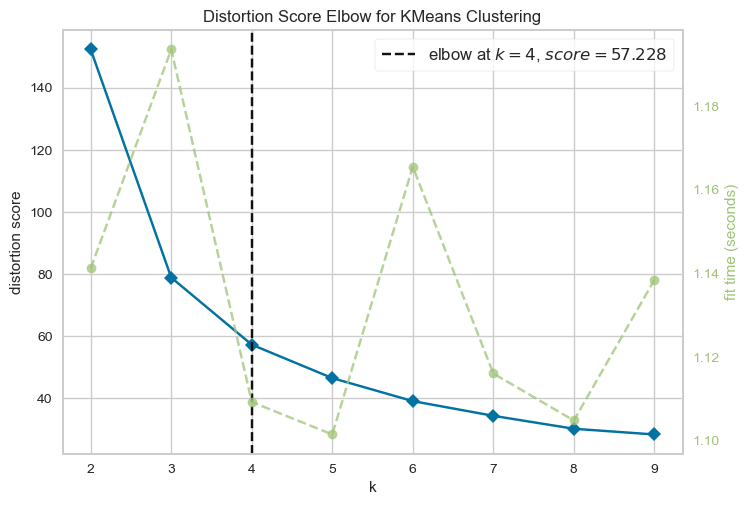

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
km=KMeans(random_state=42)
vis=KElbowVisualizer(km,k=(2,10)) 
vis.fit(X)
vis.show()

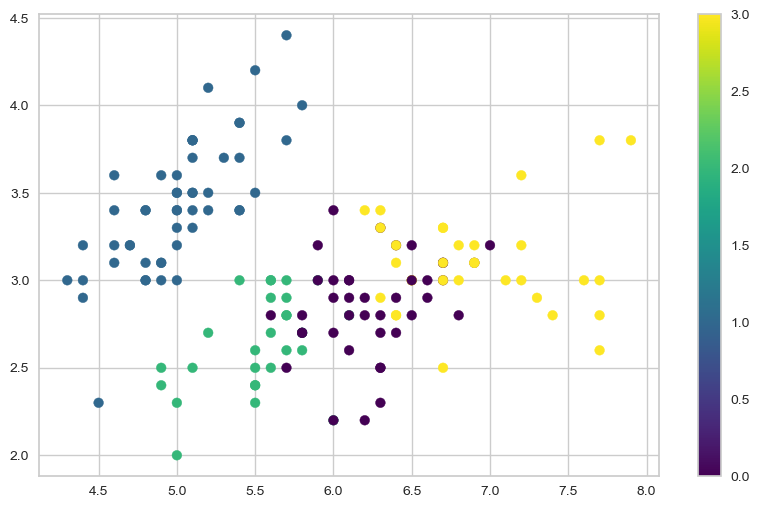

In [17]:
km = KMeans(n_clusters=4,random_state=42)
km.fit(X)
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=km.labels_, cmap='viridis')
plt.colorbar()